In [1]:
import torch
import torchvision.models as models
from torchvision.models import AlexNet_Weights

# Cargar el modelo AlexNet preentrenado usando los pesos actuales
weights = AlexNet_Weights.DEFAULT
model = models.alexnet(weights=weights)

# Colocar el modelo en modo de evaluación
model.eval()


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 72.8MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# **Estructura actual de mi repositorio Github**

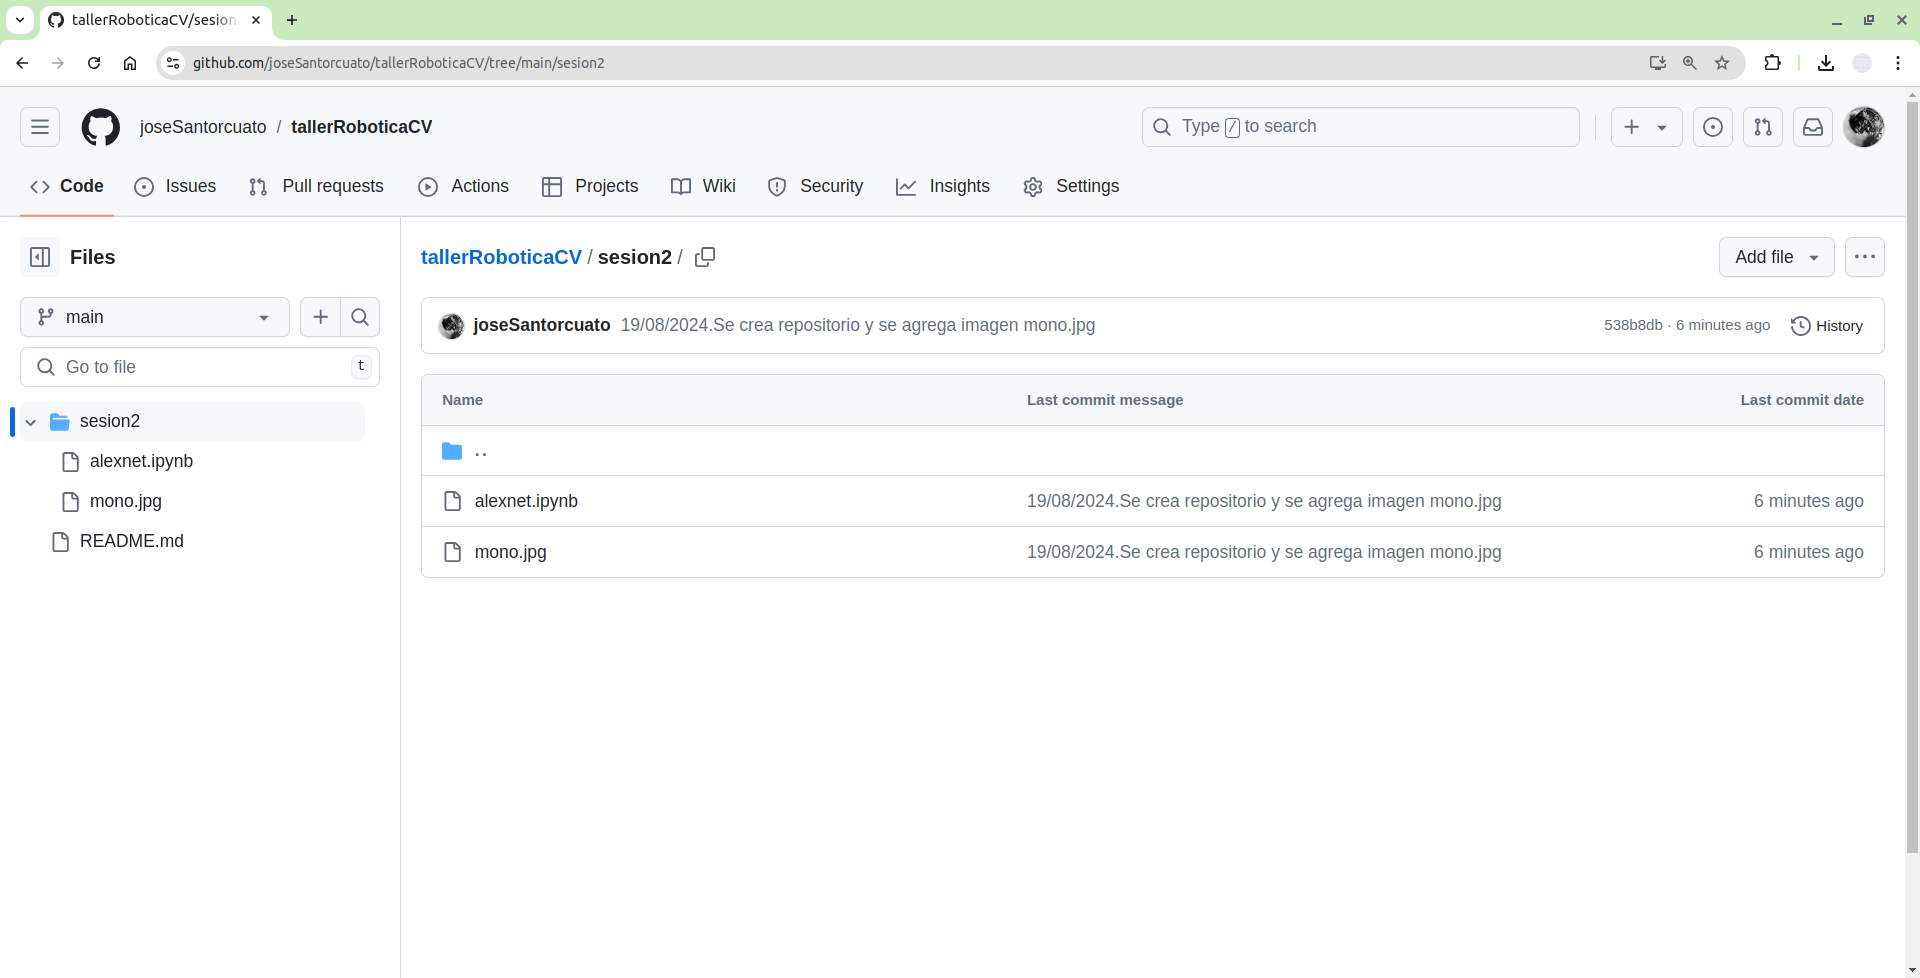

## Si tengo la imagen suelta, no al interior de una carpeta en Github

In [ ]:
import urllib.request

url = "https://github.com/joseSantorcuato/tallerRoboticaCV/raw/main/mono.jpg"
filename = "mono.jpg"

try:
    urllib.request.urlretrieve(url, filename)
    print("Imagen descargada correctamente")
except Exception as e:
    print(f"Error al descargar la imagen: {e}")


Error al descargar la imagen: HTTP Error 404: Not Found


## Si tengo la imagen al interior de una carpeta, en este caso, ***sesion2***

In [2]:
import urllib.request

url = "https://github.com/joseSantorcuato/tallerRoboticaCV/raw/main/sesion2/mono.jpg"
filename = "mono.jpg"

try:
    urllib.request.urlretrieve(url, filename)
    print("Imagen descargada correctamente")
except Exception as e:
    print(f"Error al descargar la imagen: {e}")


Imagen descargada correctamente


In [3]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open("mono.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.6567e+00,  4.1928e-01, -8.2277e-01, -4.8459e+00, -4.2661e+00,
        -1.6921e+00, -3.3672e+00, -2.1501e-01,  3.9015e+00,  5.3677e+00,
         3.5513e+00,  7.8228e+00,  2.3714e+00,  1.7449e+00,  2.1124e+00,
         1.1189e+00,  6.4666e-01, -3.6220e-01, -1.5083e+00,  1.8233e-01,
        -3.8978e-02,  5.3349e+00,  5.4858e-01,  4.5290e+00,  4.0175e+00,
         1.0571e+00,  3.3344e+00, -2.9328e-01, -8.0184e-01, -2.4033e+00,
        -1.9207e-01,  3.2344e+00,  3.0921e+00,  6.5657e-01, -9.7780e-01,
         2.9147e-01,  2.3661e+00, -9.3806e-01,  2.0674e+00, -2.7099e+00,
        -1.1247e+00, -8.1161e-01,  3.6359e+00,  2.8752e+00,  1.6841e-01,
        -6.5049e-01, -1.7025e+00, -5.9980e-01,  2.3208e-01, -2.8438e+00,
        -4.5225e+00, -2.1805e+00, -1.2032e+00,  8.7734e-01, -1.0694e+00,
        -2.4343e+00, -6.8707e-01, -6.1880e-01, -6.1986e-01, -1.9102e+00,
        -7.5711e-01,  6.1738e-02, -1.0605e+00,  5.6418e+00, -2.0980e+00,
         8.5175e-01, -7.9198e-01, -2.2454e+00, -2.0

In [4]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-08-19 14:28:05--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-08-19 14:28:05 (73.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [5]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

titi 0.49356982111930847
squirrel monkey 0.4252679646015167
patas 0.03111918829381466
spider monkey 0.016034649685025215
guenon 0.008509963750839233
